## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.append('/Users/tudorlapusan/Documents/workspaces/ml/DecisionTreeStructure/')

In [3]:
import numpy as np
import sklearn
import pandas as pd
import graphviz
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from tree.decision_tree_structure import DecisionTreeStructure

## Data load

In [4]:
train_raw = pd.read_csv("../data/train_titanic.csv")

In [5]:
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

In [6]:
train_raw.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data transformation

#### Age

In [8]:
train_raw["Age_na"] = train_raw["Age"].isna().astype(int)
train_raw.fillna({"Age":train_raw.median()["Age"]}, inplace=True)

#### Sex

In [9]:
train_raw["Sex_label"] = train_raw["Sex"].astype("category").cat.codes

In [10]:
train_raw["Cabin_label"] = train_raw["Cabin"].astype("category").cat.codes
train_raw["Embarked_label"] = train_raw["Embarked"].astype("category").cat.codes

In [11]:
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Sex_label,Cabin_label,Embarked_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,-1,2
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,-1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,129,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1,-1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,-1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0,-1,0


## Select features and target variables

In [12]:
features = ["Pclass", "Age", "Sex_label", "Fare", "Cabin_label", "Embarked_label"]
target = "Survived"

## Decision tree structure visualizations

### Default values

In [13]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(train_raw[features], train_raw[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
dts = DecisionTreeStructure(model, train_raw, features, target)

In [22]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves,

In [16]:
#help(model)

In [17]:
#help(dts)

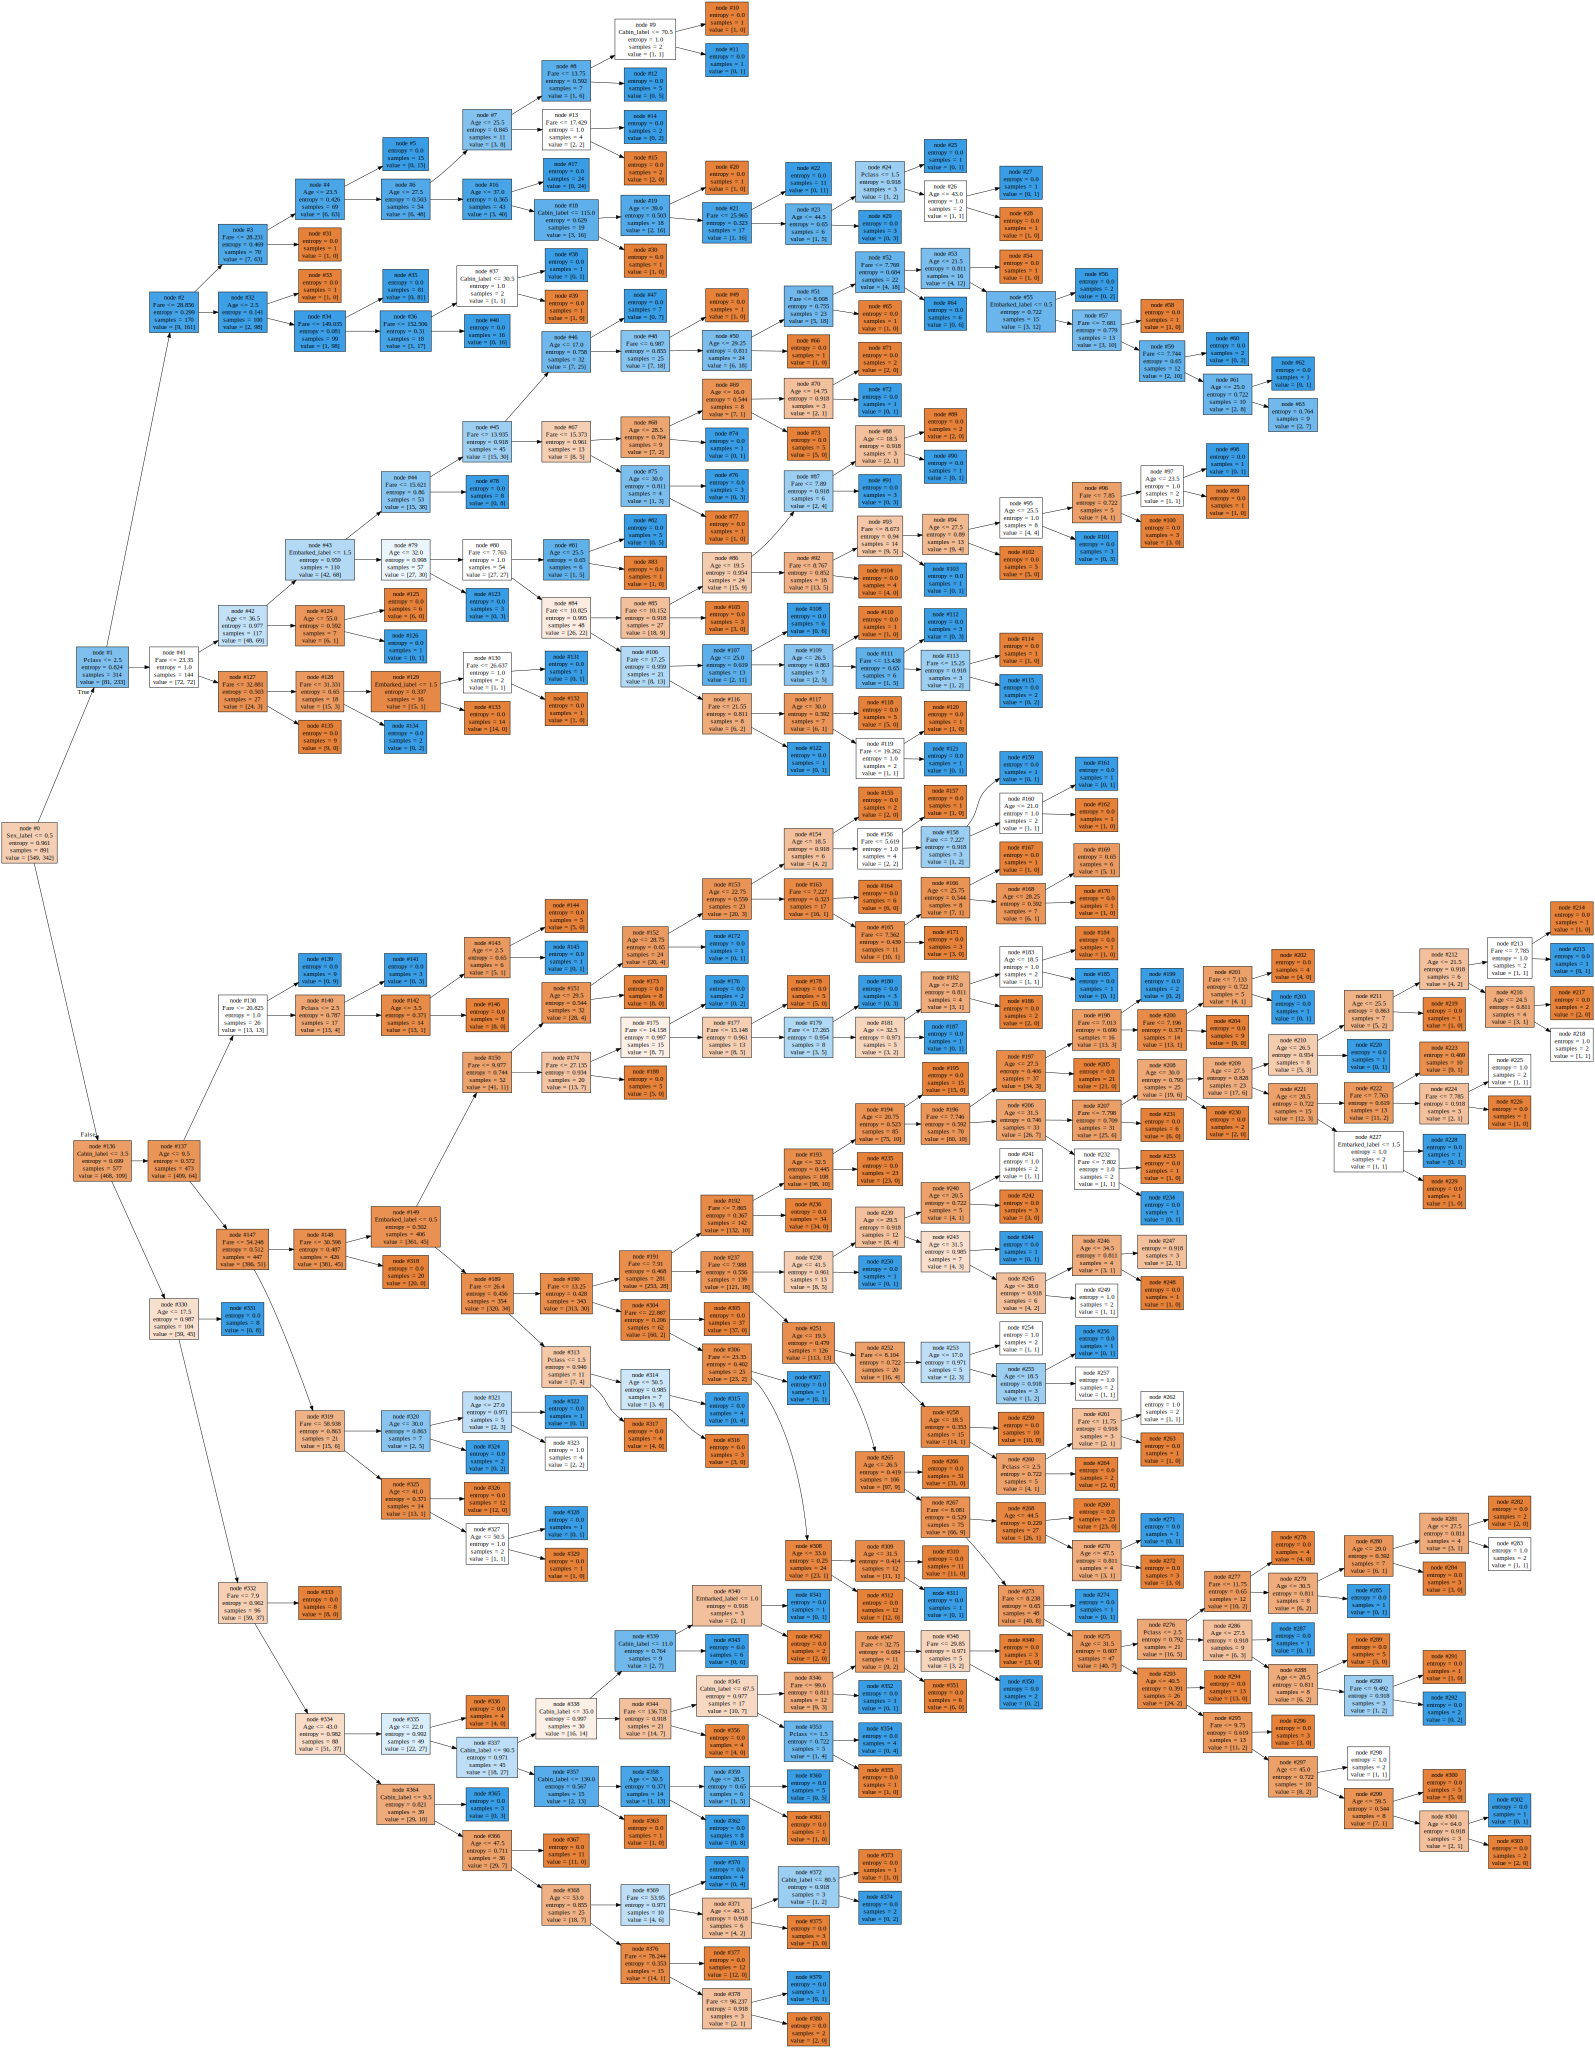

In [18]:
dts.show_decision_tree_structure()

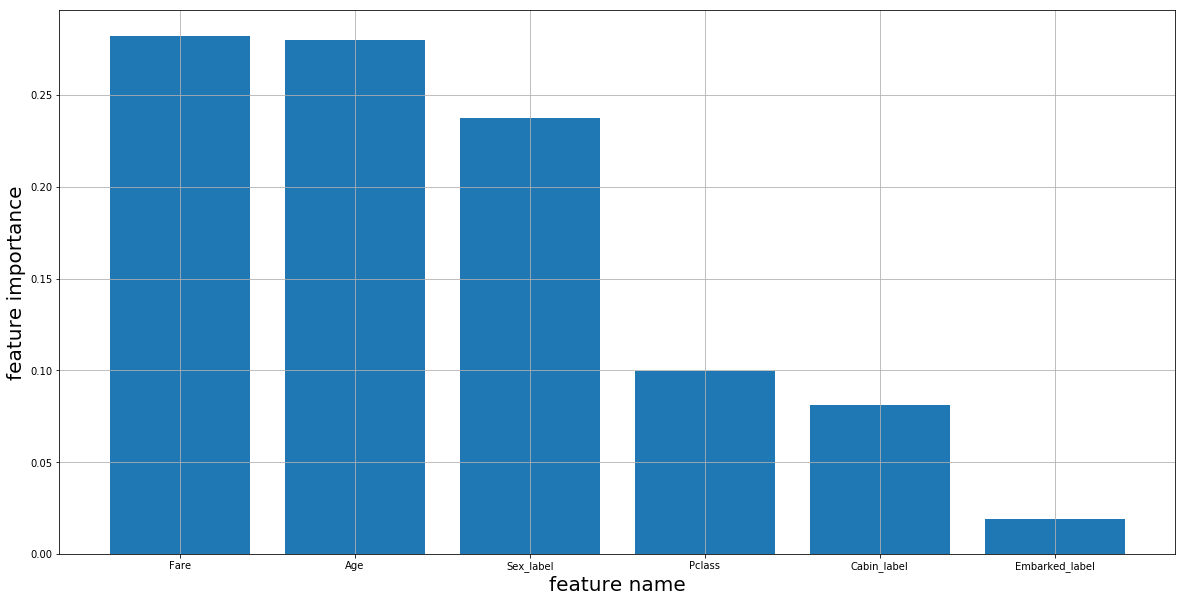

In [19]:
dts.show_features_importance()

In [20]:
sample = train_raw[features].iloc[2]
print(sample)

Pclass             3.000
Age               26.000
Sex_label          0.000
Fare               7.925
Cabin_label       -1.000
Embarked_label     2.000
Name: 2, dtype: float64


INFO - Make a prediction for sample Pclass             3.000
Age               26.000
Sex_label          0.000
Fare               7.925
Cabin_label       -1.000
Embarked_label     2.000
Name: 2, dtype: float64
INFO - decision path [  0   1  41  42  43  79  80  84  85  86  92  93  94  95 101]


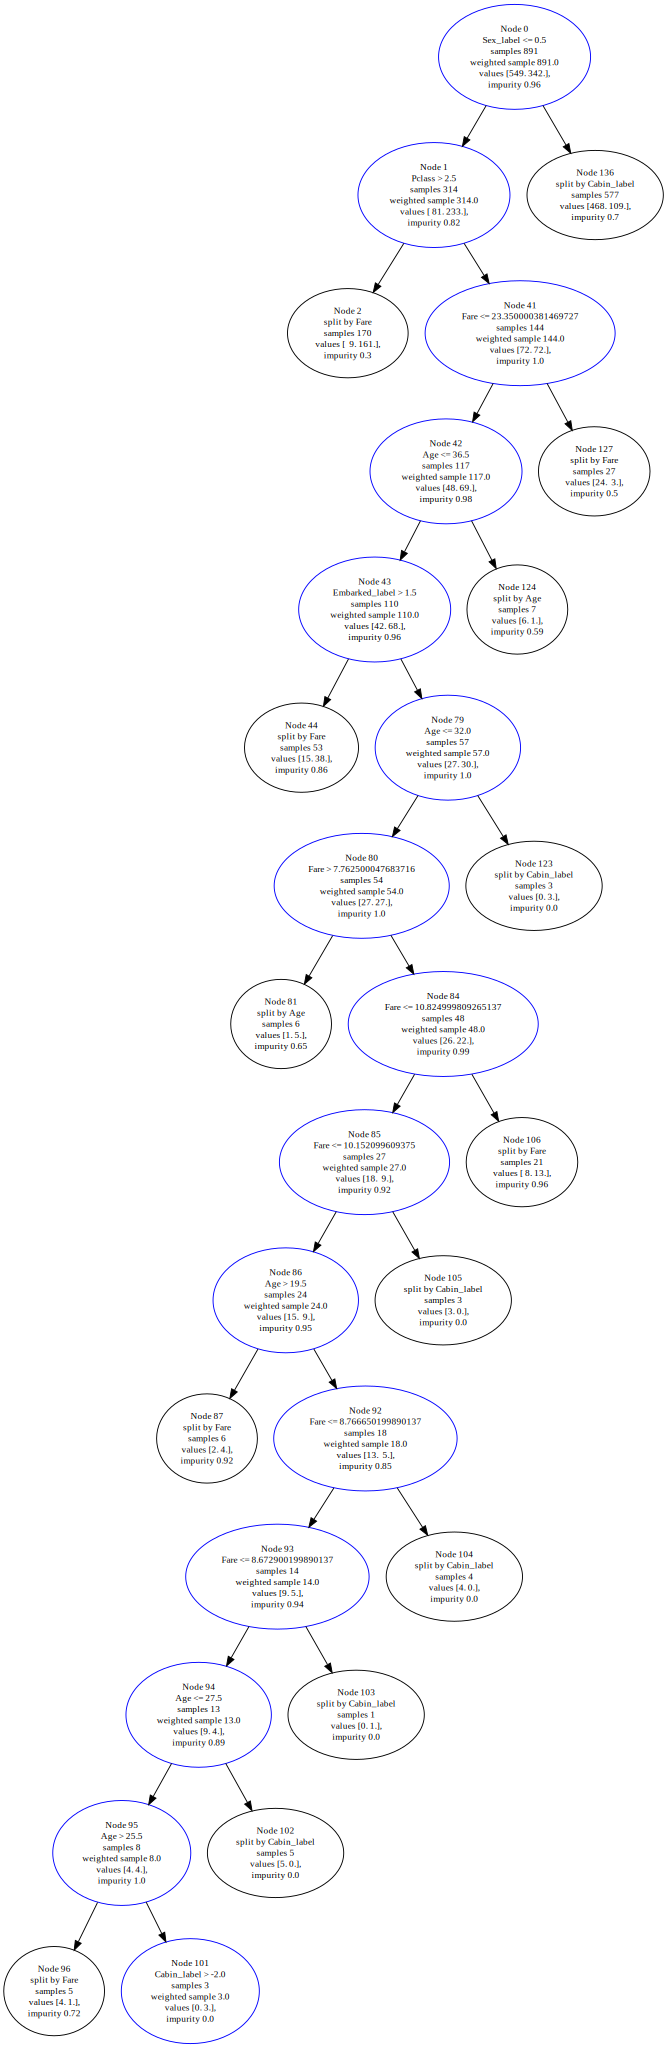

In [29]:
dts.show_decision_tree_prediction_path(sample)

[('Pclass', 3.0), ('Age', 26.0), ('Age_na', 0.0), ('Sex_label', 0.0), ('SibSp', 0.0), ('Parch', 0.0), ('Fare', 7.925), ('Cabin_label', -1.0), ('Embarked_label', 2.0)]

nodeId 0, Sex_label(0.0) <= 0.5, sample size 891, impurity 0.96 
(549, 342)


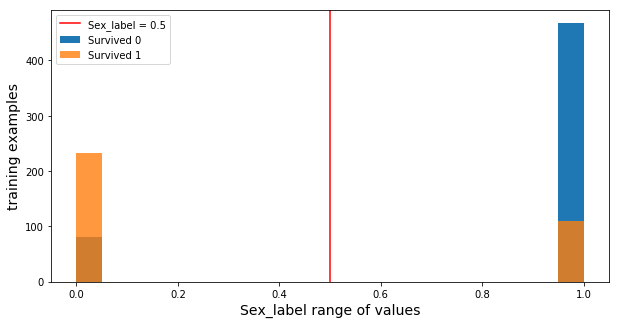

nodeId 1, Pclass(3.0) > 2.5, sample size 314, impurity 0.82 
(81, 233)


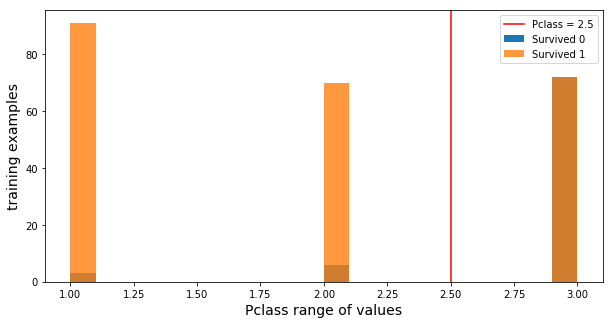

nodeId 39, Fare(7.925) <= 23.350000381469727, sample size 144, impurity 1.0 
(72, 72)


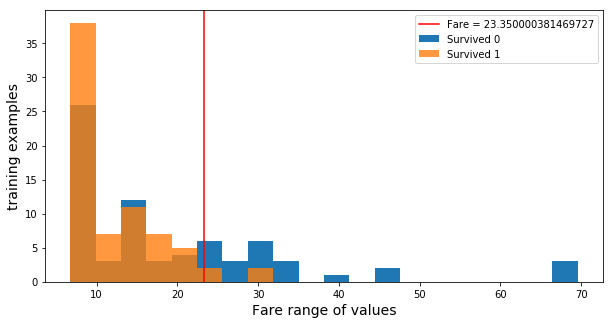

nodeId 40, Age(26.0) <= 36.5, sample size 117, impurity 0.98 
(48, 69)


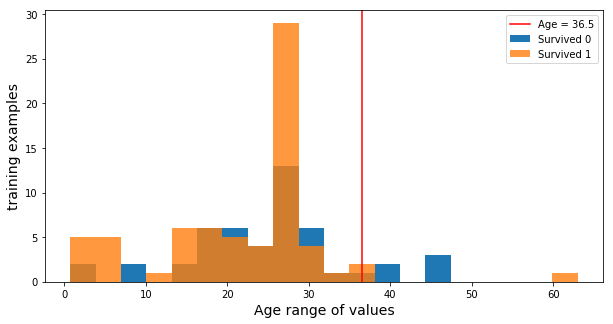

nodeId 41, Embarked_label(2.0) > 1.5, sample size 110, impurity 0.96 
(42, 68)


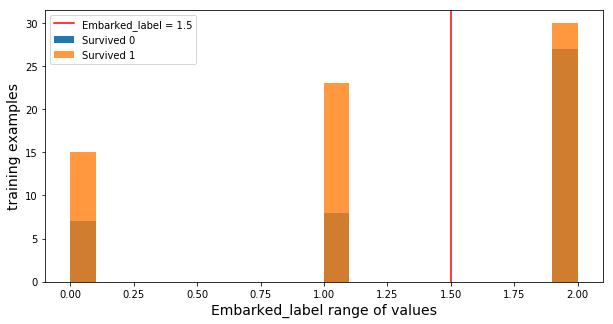

nodeId 79, Age(26.0) <= 32.0, sample size 57, impurity 1.0 
(27, 30)


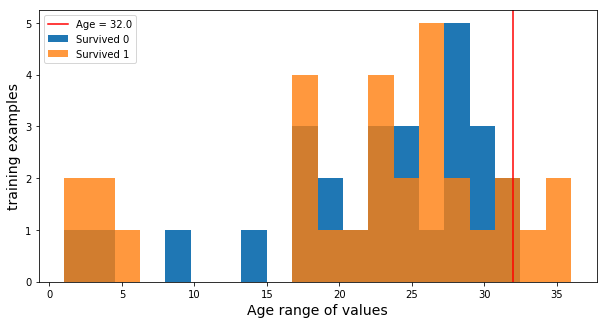

nodeId 80, Fare(7.925) > 7.762500047683716, sample size 54, impurity 1.0 
(27, 27)


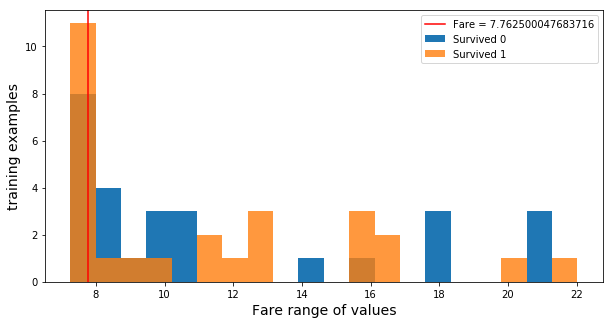

nodeId 84, Fare(7.925) <= 10.824999809265137, sample size 48, impurity 0.99 
(26, 22)


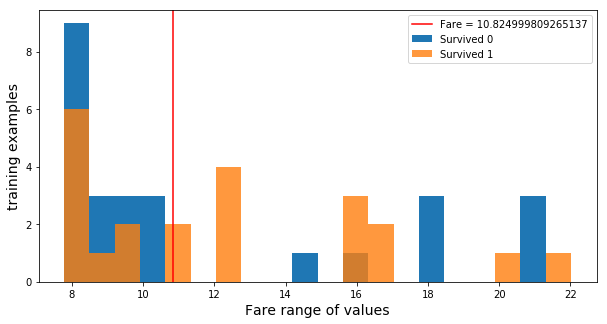

nodeId 85, Fare(7.925) <= 10.152099609375, sample size 27, impurity 0.92 
(18, 9)


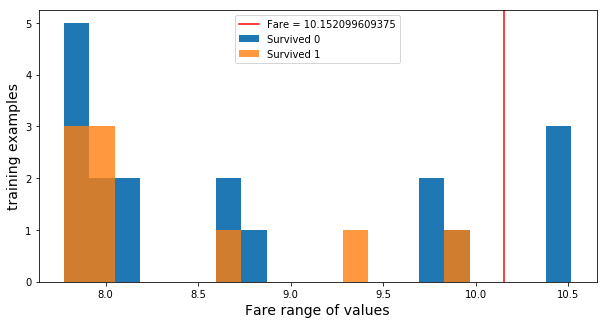

nodeId 86, Parch(0.0) <= 0.5, sample size 24, impurity 0.95 
(15, 9)


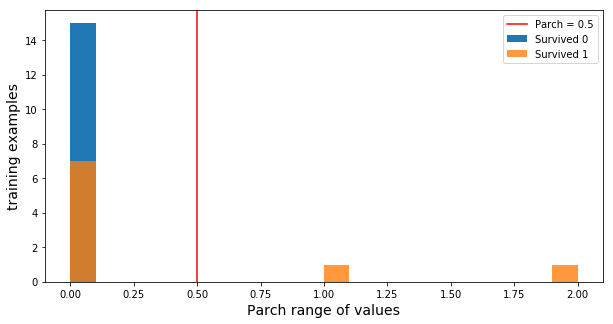

nodeId 87, Fare(7.925) <= 9.839599609375, sample size 22, impurity 0.9 
(15, 7)


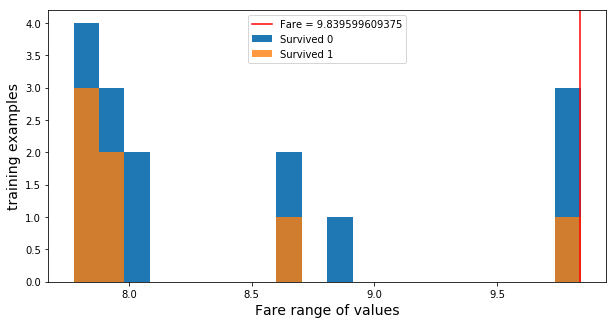

nodeId 88, Fare(7.925) <= 8.766650199890137, sample size 21, impurity 0.86 
(15, 6)


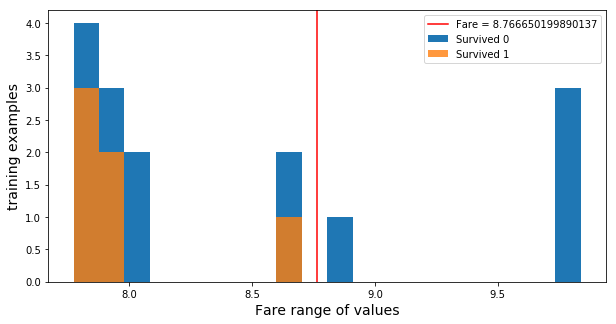

nodeId 89, Fare(7.925) <= 8.672900199890137, sample size 17, impurity 0.94 
(11, 6)


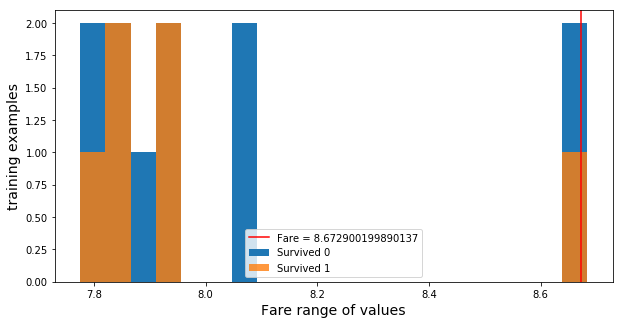

nodeId 90, Age(26.0) <= 27.5, sample size 16, impurity 0.9 
(11, 5)


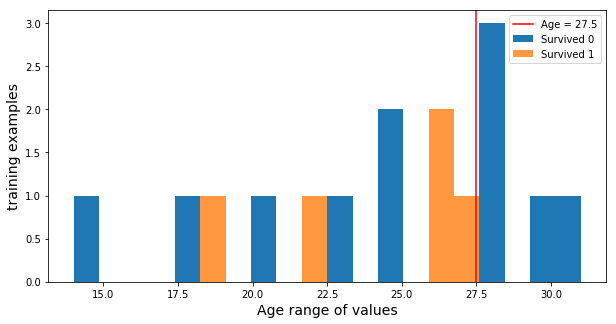

nodeId 91, Age(26.0) > 25.5, sample size 11, impurity 0.99 
(6, 5)


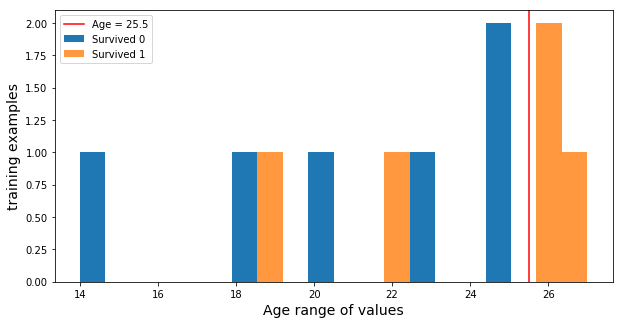

nodeId 99, Cabin_label(-1.0) > -2.0, sample size 3, impurity 0.0 
(0, 3)


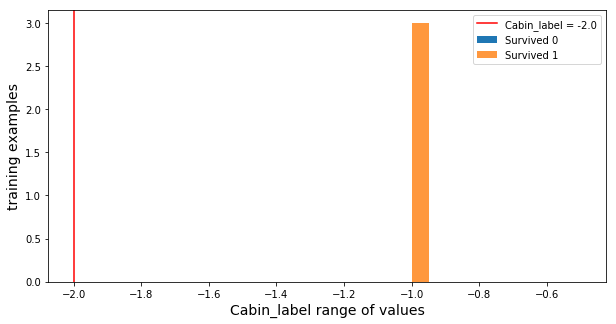

In [23]:
dts.show_decision_tree_splits_prediction(sample, bins=20)

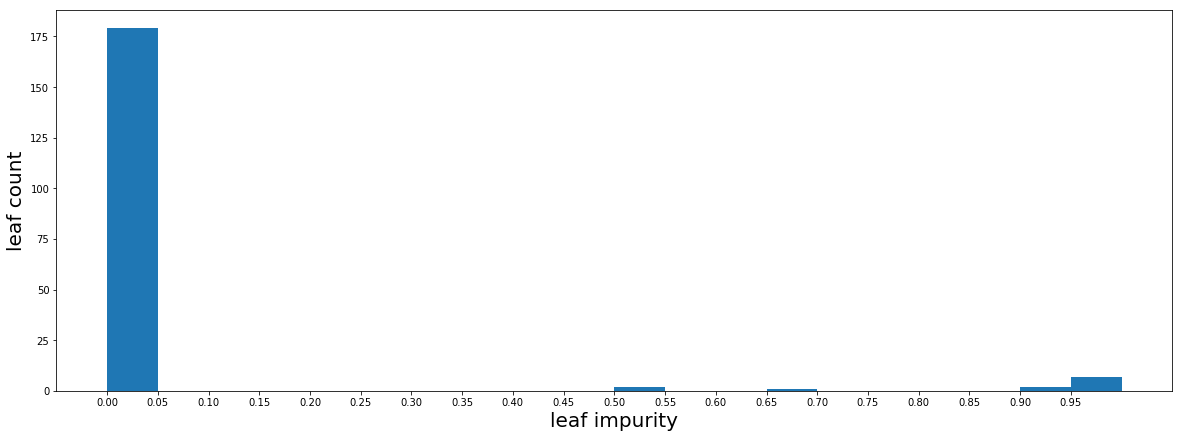

In [24]:
dts.show_leaf_impurity_distribution(bins = 20, figsize=(20,7))

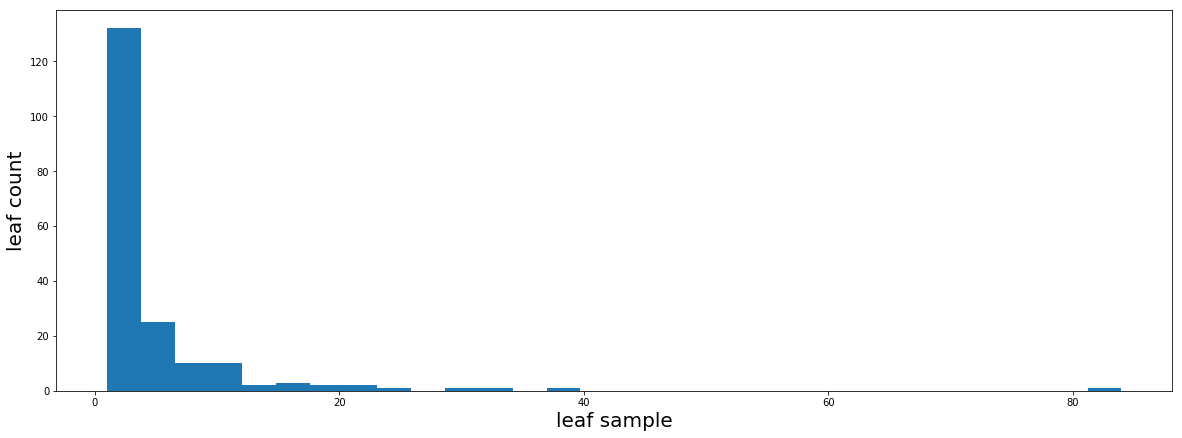

In [25]:
dts.show_leaf_samples_distribution(bins=30, figsize=(20,7))

what is the range of values for impurity ?

In [29]:
dts.show_leaf_impurity(show_type="text")


5 0.0
10 0.0
11 0.0
12 0.0
14 0.0
15 0.0
17 0.0
20 0.0
22 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
31 0.0
33 0.0
35 0.0
37 0.0
38 0.0
45 0.0
49 0.0
51 0.0
52 0.0
53 0.0
59 0.0
60 0.0
62 0.0
63 0.5435644431995964
64 0.0
65 0.0
66 0.0
71 0.0
72 0.0
73 0.0
74 0.0
76 0.0
77 0.0
78 0.0
82 0.0
83 0.0
94 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
108 0.0
110 0.0
112 0.0
114 0.0
115 0.0
118 0.0
120 0.0
121 0.0
122 0.0
123 0.0
125 0.0
126 0.0
128 0.0
130 0.0
132 0.0
133 0.0
137 0.0
139 0.0
142 0.0
143 0.0
144 0.0
152 0.0
154 0.0
156 0.0
158 0.0
159 0.0
160 0.0
162 0.0
169 0.0
170 0.6500224216483541
171 0.0
172 0.0
173 0.0
177 0.0
178 0.0
179 0.0
180 0.0
181 0.0
183 0.0
184 0.0
191 0.0
194 0.0
198 0.0
199 0.0
200 0.0
205 0.0
206 0.0
207 0.0
208 0.0
210 1.0
212 0.0
214 0.0
216 0.0
220 0.0
221 0.0
222 0.0
223 0.0
225 0.0
229 0.5032583347756457
230 0.0
231 0.0
232 1.0
233 0.0
234 0.0
240 0.0
242 0.0
244 0.9182958340544896
245 1.0
246 0.0
247 0.0
248 0.0
252 1.0
25

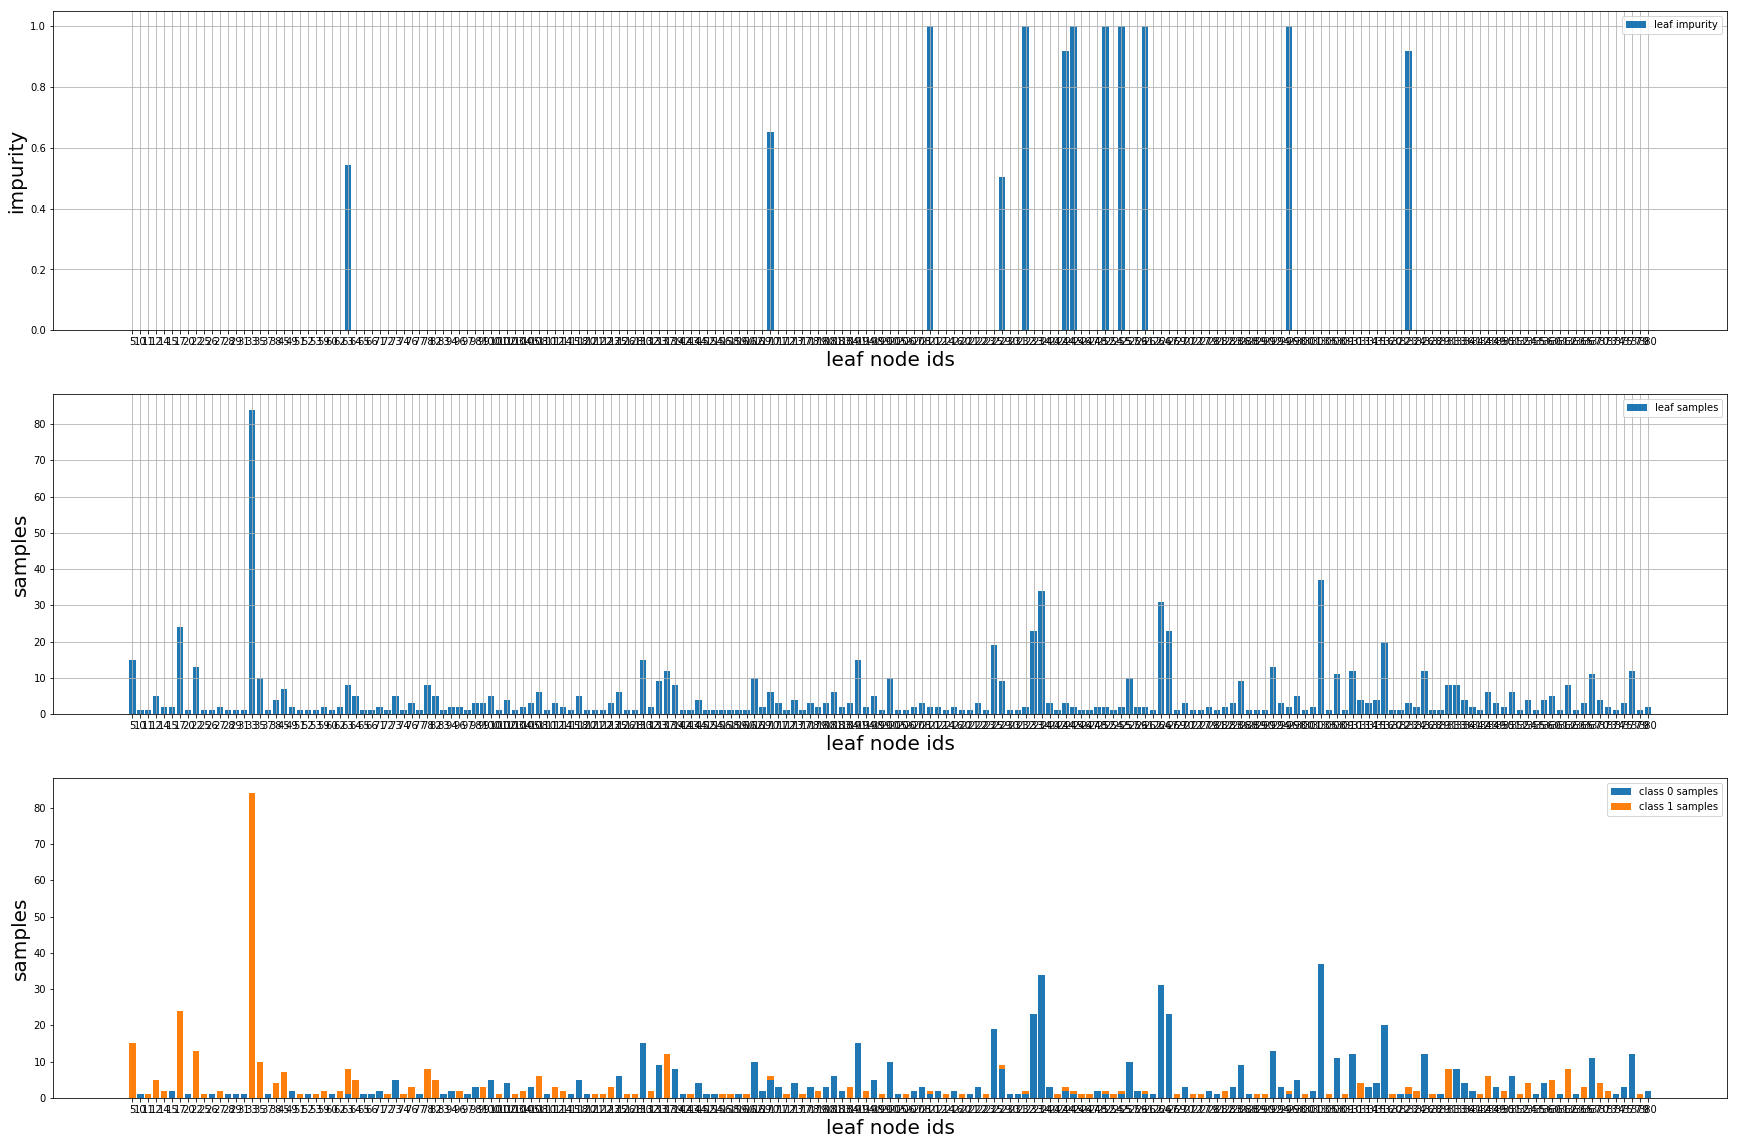

In [26]:
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
dts.show_leaf_impurity()

plt.subplot(3,1,2)
dts.show_leaf_samples()

plt.subplot(3,1,3)
dts.show_leaf_samples_by_class()
